In [12]:
# !pip install scikit-learn
# !pip install tensorflow
# !pip install matplotlib
# !pip install pandas
# !pip install opencv-python
# !pip install seaborn

In [3]:
import h5py
import datetime
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight
%matplotlib inline

In [141]:
import os
import cv2
import h5py
import numpy as np

def load_data(path_prefix, dataset_name, splits=['train', 'val', 'test']):
    X, y = {}, {}

    IMG_SIZE = 224

    Label_Mapping = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral', 7:'Contempt'}
    
    for split in splits:
        PATH = os.path.join(path_prefix, dataset_name, split)
        X[split], y[split] = [], []
        for classes in Label_Mapping.values():
            class_path = os.path.join(PATH, classes)
            class_numeric = next((k for k, v in Label_Mapping.items() if v == classes), None)
            print(f"{classes}_{class_numeric}_{class_path}")
            print('---------------')

            try:
                for sample in os.listdir(class_path):
                    sample_path = os.path.join(class_path, sample)
                    image = cv2.imread(sample_path, cv2.IMREAD_COLOR)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
                    X[split].append(image)
                    y[split].append(class_numeric)
            except:
                print(f"Dataset doesn't have class {classes}, therefore skipping.")
    
    # Convert to numpy arrays
    for split in splits:
        X[split] = np.array(X[split])
        y[split] = np.array(y[split])
        
    return X, y

In [16]:
# X, y = load_data('../../Datasets', dataset_name='JAFFE_Structured', splits=['train', 'validation', 'test'])

# with h5py.File('ferp.h5', 'w') as dataset: 
#     for split in X.keys():
#         dataset.create_dataset(f'X_{split}', data=X[split])
#         dataset.create_dataset(f'y_{split}', data=y[split])

# del X, y

In [17]:
# import pandas as pd
# import numpy as np
# from sklearn.utils import shuffle
# from sklearn.utils.class_weight import compute_class_weight
# from PIL import Image
# import os

# data_path = '../../Datasets/JAFFE_Structured'

# # Define dataset paths
# train_dir = f'{data_path}/train'
# valid_dir = f'{data_path}/validation'
# test_dir = f'{data_path}/test'

# def load_data(directory, img_size=(120, 120)):
#     """
#     Load images and labels from a directory containing a labels.csv file.
#     Args:
#         directory: Path to dataset split directory
#         img_size: Target size for image resizing
#     Returns:
#         Tuple of (images array, labels array)
#     """
#     # Load CSV with image filenames and labels
#     labels_path = os.path.join(directory, 'labels.csv')
#     df = pd.read_csv(labels_path)
    
#     # Adjust these column names if your CSV uses different headers
#     filenames = df['filename']
#     labels = df['label'].values
    
#     images = []
#     for filename in filenames:
#         img_path = os.path.join(directory, filename)
        
#         # Load and preprocess image
#         img = Image.open(img_path).convert('RGB')
#         img = img.resize(img_size)
#         img_array = np.array(img)
        
#         # Optional normalization (uncomment if needed)
#         # img_array = img_array / 255.0
        
#         images.append(img_array)
    
#     return np.array(images), labels

# # Load all datasets
# X_train, y_train = load_data(train_dir)
# X_valid, y_valid = load_data(valid_dir)
# X_test, y_test = load_data(test_dir)

# # Shuffle training data
# X_train, y_train = shuffle(X_train, y_train, random_state=42)

# # Print shapes
# print("Shape of train_sample: {}".format(X_train.shape))
# print("Shape of train_label: {}".format(y_train.shape))
# print("Shape of valid_sample: {}".format(X_valid.shape))
# print("Shape of valid_label: {}".format(y_valid.shape))
# print("Shape of test_sample: {}".format(X_test.shape))
# print("Shape of test_label: {}".format(y_test.shape))

# # Calculate class weights
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_weights = dict(enumerate(class_weights))

In [18]:
# X_train, y_train = load_data('../../Datasets', dataset_name='JAFFE_Structured', splits=['train'])
# print(X_train)

In [19]:
# NUM_CLASSES = 6
# IMG_SHAPE = (120, 120, 3)
# BATCH_SIZE = 8

# TRAIN_EPOCH = 3000 #00
# TRAIN_LR = 1e-3
# TRAIN_ES_PATIENCE = 15
# TRAIN_LR_PATIENCE = 3
# TRAIN_MIN_LR = 1e-6
# TRAIN_DROPOUT = 0.1

# FT_EPOCH = 500
# FT_LR = 1e-5
# FT_LR_DECAY_STEP = 40.0 #80.0
# FT_LR_DECAY_RATE = 1
# FT_ES_PATIENCE = 20
# FT_DROPOUT = 0.2

# ES_LR_MIN_DELTA = 0.003

In [5]:
NUM_CLASSES = 6
IMG_SHAPE = (120, 120, 3)
BATCH_SIZE = 8

TRAIN_EPOCH = 100
TRAIN_LR = 1e-3
TRAIN_ES_PATIENCE = 15
TRAIN_LR_PATIENCE = 9
TRAIN_MIN_LR = 1e-6
TRAIN_DROPOUT = 0.1

FT_EPOCH = 500
FT_LR = 1e-5
FT_LR_DECAY_STEP = 40.0#80.0
FT_LR_DECAY_RATE = 1
FT_ES_PATIENCE = 20
FT_DROPOUT = 0.2

ES_LR_MIN_DELTA = 0.003

In [6]:
X, y = load_data('../../Datasets', dataset_name='JAFFE_Structured', splits=['train', 'validation', 'test'])
# X, y = load_data('../../Datasets', dataset_name='FER_Structured', splits=['train', 'validation', 'test'])

X_train, y_train = shuffle(X['train'], y['train'])
X_valid, y_valid = X['validation'], y['validation']
X_test, y_test = X['test'], y['test']

# X_train, y_train = shuffle(X_train, y_train)

print("Shape of train_sample: {}".format(X_train.shape))
print("Shape of train_label: {}".format(y_train.shape))
print("Shape of valid_sample: {}".format(X_valid.shape))
print("Shape of valid_label: {}".format(y_valid.shape))
print("Shape of test_sample: {}".format(X_test.shape))
print("Shape of test_label: {}".format(y_test.shape))

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print(class_weights)

Dataset doesn't have class Neutral, therefore skipping.
Dataset doesn't have class Contempt, therefore skipping.
Dataset doesn't have class Neutral, therefore skipping.
Dataset doesn't have class Contempt, therefore skipping.
Dataset doesn't have class Neutral, therefore skipping.
Dataset doesn't have class Contempt, therefore skipping.
Shape of train_sample: (128, 224, 224, 3)
Shape of train_label: (128,)
Shape of valid_sample: (41, 224, 224, 3)
Shape of valid_label: (41,)
Shape of test_sample: (44, 224, 224, 3)
Shape of test_label: (44,)
{0: np.float64(1.1851851851851851), 1: np.float64(0.8888888888888888), 2: np.float64(4.266666666666667), 3: np.float64(0.6274509803921569), 4: np.float64(0.927536231884058), 5: np.float64(0.8888888888888888)}


In [22]:
# # Model Building
# input_layer = tf.keras.Input(shape=IMG_SHAPE, name='universal_input')
# sample_resizing = tf.keras.layers.Resizing(224, 224, name="resize")
# data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip(mode='horizontal'), 
#                                         tf.keras.layers.RandomContrast(factor=0.3)], name="augmentation")
# preprocess_input = tf.keras.applications.mobilenet.preprocess_input

# backbone = tf.keras.applications.mobilenet.MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
# backbone.trainable = False
# base_model = tf.keras.Model(backbone.input, backbone.layers[-29].output, name='base_model')

# self_attention = tf.keras.layers.Attention(use_scale=True, name='attention')
# patch_extraction = tf.keras.Sequential([
#     tf.keras.layers.SeparableConv2D(256, kernel_size=4, strides=4, padding='same', activation='relu'), 
#     tf.keras.layers.SeparableConv2D(256, kernel_size=2, strides=2, padding='valid', activation='relu'), 
#     tf.keras.layers.Conv2D(256, kernel_size=1, strides=1, padding='valid', activation='relu')
# ], name='patch_extraction')
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D(name='gap')
# pre_classification = tf.keras.Sequential([tf.keras.layers.Dense(32, activation='relu'), 
#                                           tf.keras.layers.BatchNormalization()], name='pre_classification')
# prediction_layer = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax", name='classification_head')

# inputs = input_layer
# x = sample_resizing(inputs)
# x = data_augmentation(x)
# x = preprocess_input(x)
# x = base_model(x, training=False)
# x = patch_extraction(x)
# x = global_average_layer(x)
# x = tf.keras.layers.Dropout(TRAIN_DROPOUT)(x)
# x = pre_classification(x)
# x = tf.keras.layers.Reshape((1, 32))(x) #----
# x = self_attention([x, x])
# x = tf.keras.layers.Reshape((32,))(x)  #----
# outputs = prediction_layer(x)
# model = tf.keras.Model(inputs, outputs, name='train-head')
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=TRAIN_LR, global_clipnorm=3.0), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Training Procedure
# early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=TRAIN_ES_PATIENCE, min_delta=ES_LR_MIN_DELTA, restore_best_weights=True)
# learning_rate_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=TRAIN_LR_PATIENCE, verbose=0, min_delta=ES_LR_MIN_DELTA, min_lr=TRAIN_MIN_LR)

# class_weights = {cls: float(weight) for cls, weight in class_weights.items()}

# history = model.fit(X_train, y_train, epochs=TRAIN_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_valid, y_valid), verbose=0, 
#                     class_weight=class_weights, callbacks=[early_stopping_callback, learning_rate_callback])



# # history = model.fit(X_train, y_train, epochs=TRAIN_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_valid, y_valid), verbose=0, callbacks=[early_stopping_callback, learning_rate_callback])
# test_loss, test_acc = model.evaluate(X_test, y_test)

# # Model Finetuning
# print("\nFinetuning ...")
# unfreeze = 59
# base_model.trainable = True
# fine_tune_from = len(base_model.layers) - unfreeze
# for layer in base_model.layers[:fine_tune_from]:
#     layer.trainable = False
# for layer in base_model.layers[fine_tune_from:]:
#     if isinstance(layer, tf.keras.layers.BatchNormalization):
#         layer.trainable = False

# inputs = input_layer
# x = sample_resizing(inputs)
# x = data_augmentation(x)
# x = preprocess_input(x)
# x = base_model(x, training=False)
# x = patch_extraction(x)
# x = tf.keras.layers.SpatialDropout2D(FT_DROPOUT)(x)
# x = global_average_layer(x)
# x = tf.keras.layers.Dropout(FT_DROPOUT)(x)
# x = pre_classification(x)
# x = tf.keras.layers.Reshape((1, 32))(x)  #----
# x = self_attention([x, x])
# x = tf.keras.layers.Reshape((32,))(x)  #----
# x = tf.keras.layers.Dropout(FT_DROPOUT)(x)
# outputs = prediction_layer(x)
# model = tf.keras.Model(inputs, outputs, name='finetune-backbone')
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=FT_LR, global_clipnorm=3.0), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Custom function to ensure the scheduler output is a float
# def lr_schedule(epoch, lr):
#     return float(scheduler(epoch))

# # Training Procedure
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=ES_LR_MIN_DELTA, patience=FT_ES_PATIENCE, restore_best_weights=True)
# scheduler = keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate=FT_LR, decay_steps=FT_LR_DECAY_STEP, decay_rate=FT_LR_DECAY_RATE)
# # scheduler_callback = tf.keras.callbacks.LearningRateScheduler(schedule=scheduler)
# scheduler_callback = tf.keras.callbacks.LearningRateScheduler(schedule=lr_schedule)

# history_finetune = model.fit(X_train, y_train, epochs=FT_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_valid, y_valid), verbose=0, 
#                              initial_epoch=history.epoch[-TRAIN_ES_PATIENCE], callbacks=[early_stopping_callback, scheduler_callback, tensorboard_callback])
# test_loss, test_acc = model.evaluate(X_test, y_test)
# model.save('modelTest.h5')

In [23]:
# # Model Building
# input_layer = tf.keras.Input(shape=IMG_SHAPE, name='universal_input')
# # sample_resizing = tf.keras.layers.experimental.preprocessing.Resizing(224, 224, name="resize")

# sample_resizing = tf.keras.layers.Resizing(224, 224, name="resize")

# data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip(mode='horizontal'), 
#                                         tf.keras.layers.RandomContrast(factor=0.3)], name="augmentation")
# preprocess_input = tf.keras.applications.mobilenet.preprocess_input

# backbone = tf.keras.applications.mobilenet.MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
# backbone.trainable = False
# base_model = tf.keras.Model(backbone.input, backbone.layers[-29].output, name='base_model')

# self_attention = tf.keras.layers.Attention(use_scale=True, name='attention')
# patch_extraction = tf.keras.Sequential([
#     tf.keras.layers.SeparableConv2D(256, kernel_size=4, strides=4, padding='same', activation='relu'), 
#     tf.keras.layers.SeparableConv2D(256, kernel_size=2, strides=2, padding='valid', activation='relu'), 
#     tf.keras.layers.Conv2D(256, kernel_size=1, strides=1, padding='valid', activation='relu')
# ], name='patch_extraction')
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D(name='gap')
# pre_classification = tf.keras.Sequential([tf.keras.layers.Dense(32, activation='relu'), 
#                                           tf.keras.layers.BatchNormalization()], name='pre_classification')
# prediction_layer = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax", name='classification_head')

# inputs = input_layer
# x = sample_resizing(inputs)
# x = data_augmentation(x)
# x = preprocess_input(x)
# x = base_model(x, training=False)
# x = patch_extraction(x)
# x = global_average_layer(x)
# x = tf.keras.layers.Dropout(TRAIN_DROPOUT)(x)
# x = pre_classification(x)
# x = tf.keras.layers.Reshape((1, 32))(x) ##---
# x = self_attention([x, x])
# x = tf.keras.layers.Reshape((32,))(x) #---
# outputs = prediction_layer(x)
# model = tf.keras.Model(inputs, outputs, name='train-head')
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=TRAIN_LR, global_clipnorm=3.0), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Training Procedure
# early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=TRAIN_ES_PATIENCE, min_delta=ES_LR_MIN_DELTA, restore_best_weights=True)
# learning_rate_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=TRAIN_LR_PATIENCE, verbose=0, min_delta=ES_LR_MIN_DELTA, min_lr=TRAIN_MIN_LR)
# history = model.fit(X_train, y_train, epochs=TRAIN_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_valid, y_valid), verbose=0, class_weight=class_weights, callbacks=[early_stopping_callback, learning_rate_callback])
# test_loss, test_acc = model.evaluate(X_test, y_test)

# # Model Finetuning
# print("\nFinetuning ...")
# unfreeze = 59
# base_model.trainable = True
# fine_tune_from = len(base_model.layers) - unfreeze
# for layer in base_model.layers[:fine_tune_from]:
#     layer.trainable = False
# for layer in base_model.layers[fine_tune_from:]:
#     if isinstance(layer, tf.keras.layers.BatchNormalization):
#         layer.trainable = False

# inputs = input_layer
# x = sample_resizing(inputs)
# x = data_augmentation(x)
# x = preprocess_input(x)
# x = base_model(x, training=False)
# x = patch_extraction(x)
# x = tf.keras.layers.SpatialDropout2D(FT_DROPOUT)(x)
# x = global_average_layer(x)
# x = tf.keras.layers.Dropout(FT_DROPOUT)(x)
# x = pre_classification(x)
# x = self_attention([x, x])
# x = tf.keras.layers.Dropout(FT_DROPOUT)(x)
# outputs = prediction_layer(x)
# model = tf.keras.Model(inputs, outputs, name='finetune-backbone')
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=FT_LR, global_clipnorm=3.0), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Training Procedure
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=ES_LR_MIN_DELTA, patience=FT_ES_PATIENCE, restore_best_weights=True)
# scheduler = keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate=FT_LR, decay_steps=FT_LR_DECAY_STEP, decay_rate=FT_LR_DECAY_RATE)
# scheduler_callback = tf.keras.callbacks.LearningRateScheduler(schedule=scheduler)

# history_finetune = model.fit(X_train, y_train, epochs=FT_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_valid, y_valid), verbose=0, 
#                              initial_epoch=history.epoch[-TRAIN_ES_PATIENCE], callbacks=[early_stopping_callback, scheduler_callback, tensorboard_callback])
# test_loss, test_acc = model.evaluate(X_test, y_test)
# model.save('model.h5')

In [26]:
# Model Building
input_layer = tf.keras.Input(shape=IMG_SHAPE, name='universal_input')
sample_resizing = tf.keras.layers.Resizing(224, 224, name="resize")
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip(mode='horizontal'), 
                                        tf.keras.layers.RandomContrast(factor=0.3)], name="augmentation")
preprocess_input = tf.keras.applications.mobilenet.preprocess_input

backbone = tf.keras.applications.mobilenet.MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
backbone.trainable = False
base_model = tf.keras.Model(backbone.input, backbone.layers[-29].output, name='base_model')

self_attention = tf.keras.layers.Attention(use_scale=True, name='attention')
patch_extraction = tf.keras.Sequential([
    tf.keras.layers.SeparableConv2D(256, kernel_size=4, strides=4, padding='same', activation='relu'), 
    tf.keras.layers.SeparableConv2D(256, kernel_size=2, strides=2, padding='valid', activation='relu'), 
    tf.keras.layers.Conv2D(256, kernel_size=1, strides=1, padding='valid', activation='relu')
], name='patch_extraction')
global_average_layer = tf.keras.layers.GlobalAveragePooling2D(name='gap')
pre_classification = tf.keras.Sequential([tf.keras.layers.Dense(32, activation='relu'), 
                                          tf.keras.layers.BatchNormalization()], name='pre_classification')
prediction_layer = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax", name='classification_head')

inputs = input_layer
x = sample_resizing(inputs)
x = data_augmentation(x)
x = preprocess_input(x)
x = base_model(x, training=False)
x = patch_extraction(x)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(TRAIN_DROPOUT)(x)
x = pre_classification(x)
x = tf.keras.layers.Reshape((1, 32))(x) #----
x = self_attention([x, x])
x = tf.keras.layers.Reshape((32,))(x) #----
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs, name='train-head')
model.compile(optimizer=keras.optimizers.Adam(learning_rate=TRAIN_LR, global_clipnorm=3.0), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training Procedure
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=TRAIN_ES_PATIENCE, min_delta=ES_LR_MIN_DELTA, restore_best_weights=True)
learning_rate_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=TRAIN_LR_PATIENCE, verbose=0, min_delta=ES_LR_MIN_DELTA, min_lr=TRAIN_MIN_LR)
history = model.fit(X_train, y_train, epochs=TRAIN_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_valid, y_valid), verbose=1, 
                    class_weight=class_weights, callbacks=[early_stopping_callback, learning_rate_callback])
test_loss, test_acc = model.evaluate(X_test, y_test)

# Model Finetuning
print("\nFinetuning ...")
unfreeze = 59
base_model.trainable = True
fine_tune_from = len(base_model.layers) - unfreeze
for layer in base_model.layers[:fine_tune_from]:
    layer.trainable = False
for layer in base_model.layers[fine_tune_from:]:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False

inputs = input_layer
x = sample_resizing(inputs)
x = data_augmentation(x)
x = preprocess_input(x)
x = base_model(x, training=False)
x = patch_extraction(x)
x = tf.keras.layers.SpatialDropout2D(FT_DROPOUT)(x)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(FT_DROPOUT)(x)
x = pre_classification(x)
x = tf.keras.layers.Reshape((1, 32))(x) #----
x = self_attention([x, x])
x = tf.keras.layers.Reshape((32,))(x) #----
x = tf.keras.layers.Dropout(FT_DROPOUT)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs, name='finetune-backbone')
model.compile(optimizer=keras.optimizers.Adam(learning_rate=FT_LR, global_clipnorm=3.0), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Custom function to ensure the scheduler output is a float
def lr_schedule(epoch, lr):
    return float(scheduler(epoch))

# Training Procedure
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=ES_LR_MIN_DELTA, patience=FT_ES_PATIENCE, restore_best_weights=True)
scheduler = keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate=FT_LR, decay_steps=FT_LR_DECAY_STEP, decay_rate=FT_LR_DECAY_RATE)
# scheduler_callback = tf.keras.callbacks.LearningRateScheduler(schedule=scheduler)
scheduler_callback = tf.keras.callbacks.LearningRateScheduler(schedule=lr_schedule)

history_finetune = model.fit(X_train, y_train, epochs=FT_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_valid, y_valid), verbose=1, 
                             initial_epoch=history.epoch[-TRAIN_ES_PATIENCE], callbacks=[early_stopping_callback, scheduler_callback, tensorboard_callback])
test_loss, test_acc = model.evaluate(X_test, y_test)
# model.save('model.h5')
model.save('JAFFEmodel.keras')

Epoch 1/100


c:\MastersRepos\Deep-Learning-For-Computer-Vision\Models\PAtt-Lite\.venv\lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1745 - loss: 1.8551

c:\MastersRepos\Deep-Learning-For-Computer-Vision\Models\PAtt-Lite\.venv\lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.1771 - loss: 1.8509 - val_accuracy: 0.1951 - val_loss: 1.7877 - learning_rate: 0.0010
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.1809 - loss: 1.7314 - val_accuracy: 0.1951 - val_loss: 1.7823 - learning_rate: 0.0010
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.4260 - loss: 1.6232 - val_accuracy: 0.1951 - val_loss: 1.7785 - learning_rate: 0.0010
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.4699 - loss: 1.7299 - val_accuracy: 0.2439 - val_loss: 1.7610 - learning_rate: 0.0010
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.5225 - loss: 1.3343 - val_accuracy: 0.3659 - val_loss: 1.7315 - learning_rate: 0.0010
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.5689 - loss: 1.1433 - val_accuracy: 0.3415 - val_loss: 1.6957 - learning_rate: 0.0010
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7031 - loss: 0.8674 - val_accurac

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6780 - loss: 0.9676
Test Accuracy: 70.45%
Test Loss:  0.8966898322105408
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
Predicted Emotion: Neutral


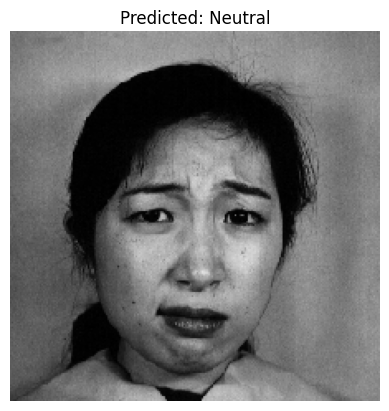

In [29]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('JAFFEmodel.keras')

# Evaluate or use the model for prediction
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print("Test Loss: ", test_loss)

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess a single image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(120, 120))  # Resize to 224x224
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.mobilenet.preprocess_input(img_array)  # Normalize like training
    return img_array

# Example usage
img_path = "TestImages/train_2_DIS.tiff"
processed_img = preprocess_image(img_path)

# Get model prediction
predictions = model.predict(processed_img)

# Get the class label with the highest probability
predicted_class = np.argmax(predictions, axis=1)[0]

# Map predicted class index back to label names
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']  # Modify based on your dataset
predicted_label = class_labels[predicted_class]

print(f"Predicted Emotion: {predicted_label}")

import matplotlib.pyplot as plt

# Load image for display
img = image.load_img(img_path, target_size=(224, 224))

# Show image with predicted label
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_label}")
plt.show()


In [7]:
import tensorflow as tf

# Check if TensorFlow can detect the GPU
if tf.config.list_physical_devices('GPU'):
    print("CUDA is enabled, and TensorFlow is using the GPU.")
else:
    print("CUDA is not enabled, and TensorFlow is using the CPU.")


CUDA is not enabled, and TensorFlow is using the CPU.


In [8]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
# import numpy as np
# import tensorflow as tf
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# import seaborn as sns
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.models import load_model

# def TestPAttLite(data_directory, model_path, batch_size=15, dataset=['test']):

#     X, y = load_data('../../Datasets', dataset_name='JAFFE_Structured', splits=dataset)

#     # X_train, y_train = shuffle(X['train'], y['train'])
#     # X_valid, y_valid = X['validation'], y['validation']
#     X_test, y_test = X['test'], y['test']

#     # Load the model
#     model = load_model(model_path)

#     # Evaluate or use the model for prediction
#     # test_loss, test_acc = model.evaluate(X_test, y_test)
#     # print(f"Test Accuracy: {test_acc * 100:.2f}%")
#     # print("Test Loss: ", test_loss)

#     # Load image for prediction
#     def preprocess_image(img_path):
#         img = image.load_img(img_path, target_size=(120, 120))  # Resize to 224x224 (if necessary)
#         img_array = image.img_to_array(img)  # Convert to array
#         img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
#         img_array = tf.keras.applications.mobilenet.preprocess_input(img_array)  # Normalize like training
#         return img_array

#     # Prediction on a single image
#     img_path = "TestImages/train_2_DIS.tiff"
#     processed_img = preprocess_image(img_path)

#     # Get model prediction
#     predictions = model.predict(processed_img)

#     # Get the class label with the highest probability
#     predicted_class = np.argmax(predictions, axis=1)[0]

#     # Map predicted class index back to label names
#     class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']#, 'Surprise', 'Contempt']  # Modify based on your dataset
#     predicted_label = class_labels[predicted_class]

#     print(f"Predicted Emotion: {predicted_label}")

#     # Visualize prediction on image
#     img = image.load_img(img_path, target_size=(224, 224))
#     # img = image.load_img(img_path, target_size=(120, 120))
#     plt.imshow(img)
#     plt.axis('off')
#     plt.title(f"Predicted: {predicted_label}")
#     plt.show()

#     # Generate confusion matrix and classification report for the test set
#     X_test = np.array([cv2.resize(img, (120, 120)) for img in X_test])  # Resize all test images
#     y_pred = model.predict(X_test)
#     y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class indices

#     # Classification report
#     report = classification_report(y_test, y_pred_classes, target_names=class_labels)
#     print("Classification Report:\n", report)

#     # Confusion Matrix
#     cm = confusion_matrix(y_test, y_pred_classes)

#     # Visualize Confusion Matrix using Seaborn heatmap
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
#     plt.title("Confusion Matrix")
#     plt.xlabel("Predicted Label")
#     plt.ylabel("True Label")
#     plt.show()

#     # Calculate additional metrics (Accuracy, Precision, Recall, F1-Score)
#     accuracy = accuracy_score(y_test, y_pred_classes)
#     precision_weighted = precision_score(y_test, y_pred_classes, average='weighted', zero_division=0)
#     precision_macro = precision_score(y_test, y_pred_classes, average='macro', zero_division=0)
#     precision_micro = precision_score(y_test, y_pred_classes, average='micro', zero_division=0)

#     recall_weighted = recall_score(y_test, y_pred_classes, average='weighted', zero_division=0)
#     recall_macro = recall_score(y_test, y_pred_classes, average='macro', zero_division=0)
#     recall_micro = recall_score(y_test, y_pred_classes, average='micro', zero_division=0)

#     f1_weighted = f1_score(y_test, y_pred_classes, average='weighted', zero_division=0)
#     f1_macro = f1_score(y_test, y_pred_classes, average='macro', zero_division=0)
#     f1_micro = f1_score(y_test, y_pred_classes, average='micro', zero_division=0)

#     # Print the metrics
#     print("Test Accuracy:", accuracy)
#     print("Precision (Weighted):", precision_weighted)
#     print("Precision (Macro):", precision_macro)
#     print("Precision (Micro):", precision_micro)
#     print("Recall (Weighted):", recall_weighted)
#     print("Recall (Macro):", recall_macro)
#     print("Recall (Micro):", recall_micro)
#     print("F1 Score (Weighted):", f1_weighted)
#     print("F1 Score (Macro):", f1_macro)
#     print("F1 Score (Micro):", f1_micro)


In [142]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)
import seaborn as sns

def TestPAttLite(data_directory, model_path, dataset=['test']):
    # Load the data (replace with your own dataset loading function)

    images = []
    labels = []
    for directory in dataset:
        X, y = load_data(data_directory, dataset_name='JAFFE_Structured', splits=[directory])
        X_dir, y_dir = X[directory], y[directory]

        X_dir = np.array([cv2.resize(img, (120, 120)) for img in X_dir])
        images.append(X_dir)
        labels.append(y_dir)

    # Convert images and labels to single arrays if needed (not nested)
    all_images = np.concatenate(images, axis=0)
    all_labels = np.concatenate(labels, axis=0)

    # Load the trained model
    model = load_model(model_path)

    # Make predictions on the test set
    y_pred = model.predict(all_images)

    # Get predicted class indices
    all_preds = np.argmax(y_pred, axis=1)
    
    # Get true class indices
    print("Labels: ", len(all_labels))
    print("Predictions: ", len(all_preds))

    accuracy = accuracy_score(all_labels, all_preds)
    precision_weighted = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    precision_macro = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    precision_micro = precision_score(all_labels, all_preds, average='micro', zero_division=0)

    recall_weighted = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall_macro = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    recall_micro = recall_score(all_labels, all_preds, average='micro', zero_division=0)

    f1_weighted = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1_macro = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    f1_micro = f1_score(all_labels, all_preds, average='micro', zero_division=0)

    report = classification_report(all_labels, all_preds, zero_division=0)
    cm = confusion_matrix(all_labels, all_preds, labels=[0, 1, 2, 3, 4, 5, 6, 7])

    # Print the metrics
    print("Test Accuracy:", accuracy)
    print("Precision (Weighted):", precision_weighted)
    print("Precision (Macro):", precision_macro)
    print("Precision (Micro):", precision_micro)
    print("Recall (Weighted):", recall_weighted)
    print("Recall (Macro):", recall_macro)
    print("Recall (Micro):", recall_micro)
    print("F1 Score (Weighted):", f1_weighted)
    print("F1 Score (Macro):", f1_macro)
    print("F1 Score (Micro):", f1_micro)
    print("\nClassification Report:\n", report)
    # print("\nConfusion Matrix:\n", cm)

    # (Optional) Visualize the confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


Angry_0_../../Datasets\JAFFE_Structured\test\Angry
---------------
Disgust_1_../../Datasets\JAFFE_Structured\test\Disgust
---------------
Fear_2_../../Datasets\JAFFE_Structured\test\Fear
---------------
Happy_3_../../Datasets\JAFFE_Structured\test\Happy
---------------
Sad_4_../../Datasets\JAFFE_Structured\test\Sad
---------------
Surprise_5_../../Datasets\JAFFE_Structured\test\Surprise
---------------
Neutral_6_../../Datasets\JAFFE_Structured\test\Neutral
---------------
Dataset doesn't have class Neutral, therefore skipping.
Contempt_7_../../Datasets\JAFFE_Structured\test\Contempt
---------------
Dataset doesn't have class Contempt, therefore skipping.


c:\MastersRepos\Deep-Learning-For-Computer-Vision\Models\PAtt-Lite\.venv\lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step

c:\MastersRepos\Deep-Learning-For-Computer-Vision\Models\PAtt-Lite\.venv\lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 440ms/step
Labels:  44
Predictions:  44
Test Accuracy: 0.6818181818181818
Precision (Weighted): 0.7326446280991735
Precision (Macro): 0.6393939393939393
Precision (Micro): 0.6818181818181818
Recall (Weighted): 0.6818181818181818
Recall (Macro): 0.5879629629629629
Recall (Micro): 0.6818181818181818
F1 Score (Weighted): 0.6965003293807641
F1 Score (Macro): 0.6028381642512076
F1 Score (Micro): 0.6818181818181818

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      0.78      0.88         9
           2       0.00      0.00      0.00         1
           3       0.64      0.58      0.61        12
           4       0.50      0.62      0.56         8
           5       0.70      0.88      0.78         8

    accuracy                           0.68        44
   macro avg       0.64      0.59      0.60        44
weighted avg       0.73      0.68      0.70   

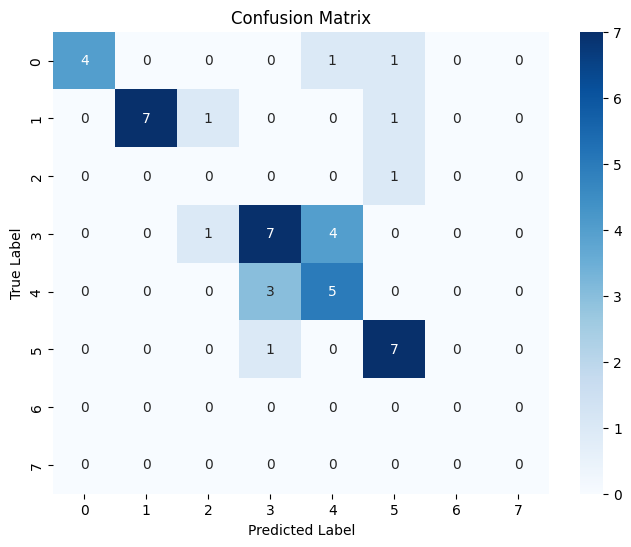

In [143]:
data_directory = '../../Datasets'
model_path = 'JAFFEmodel.keras'
TestPAttLite(data_directory, model_path, dataset=['test'])